# The idea of permutation

## A mosquito problem

![]({{ site.baseurl }}/images/{{ site.baseurl }}/images/mosquito_banner.png)

With thanks to John Rauser: [Statistics Without the Agonizing Pain](https://www.youtube.com/watch?v=5Dnw46eC-0o)

## The data

Download the data from [mosquito_beer.csv]({{ site.baseurl
}}/data/mosquito_beer.csv).

In [1]:
# Import Numpy library, rename as "np"
import numpy as np
# Import Pandas library, rename as "pd"
import pandas as pd

# Set up plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# An extra tweak to make sure we always get the same random numbers.
np.random.seed(42)

Read in the data:

In [3]:
mosquitoes = pd.read_csv('mosquito_beer.csv')
mosquitoes.head()

,volunteer,group,test,nb_released,no_odour,volunt_odour,activated,co2no,co2od,temp,trapside,datetime
0,subj1,beer,before,50,7,9,16,305.0,321.0,36.1,A,2007-08-28 19:00:00
1,subj2,beer,before,50,26,7,33,338.0,720.0,35.3,B,2007-08-28 21:00:00
2,subj3,beer,before,50,5,10,15,348.0,355.0,36.1,B,2007-09-15 19:00:00
3,subj4,beer,before,50,3,7,10,349.0,437.0,35.6,A,2007-09-25 17:00:00
4,subj5,beer,before,50,2,8,10,396.0,475.0,37.0,B,2007-09-25 18:00:00


Get the number of activated mosquitoes for the "after" treatment rows, separating the "beer" group and the "water" group.

In [4]:
# After treatment rows.
afters = mosquitoes[mosquitoes['test'] == 'after']
# After beer treatment rows.
beers = afters[afters['group'] == 'beer']
# The Activated numbers for the after beer rows.
beer_activated = np.array(beers['activated'])
beer_activated

array([14, 33, 27, 11, 12, 27, 26, 25, 27, 27, 22, 36, 37,  3, 23,  7, 25,
       17, 36, 31, 30, 22, 20, 29, 23])

In [5]:
n_beer = len(beer_activated)
n_beer

25

In [6]:
# Same for the water group.
waters = afters[afters['group'] == 'water']
water_activated = np.array(waters['activated'])
water_activated

array([33, 23, 23, 13, 24,  8,  4, 21, 24, 21, 26, 27, 22, 21, 25, 20,  7,
        3])

In [7]:
n_water = len(water_activated)
n_water

18

## The permutation way

* Calculate difference in means
* Pool
* Repeat many times:
    * Shuffle
    * Split
    * Recalculate difference in means
    * Store

## On balls

![]({{ site.baseurl }}/images/just_balls.png)

## The difference in means

![]({{ site.baseurl }}/images/beer_mean.png)

In [8]:
print(np.mean(beer_activated))
print(np.mean(water_activated))

23.6
19.166666666666668


## The difference in means

![]({{ site.baseurl }}/images/water_mean.png)

In [9]:
actual_diff = np.mean(beer_activated) - np.mean(water_activated)
actual_diff

4.433333333333334

## Pool

In [10]:
pooled = np.append(beer_activated, water_activated)
pooled

array([14, 33, 27, 11, 12, 27, 26, 25, 27, 27, 22, 36, 37,  3, 23,  7, 25,
       17, 36, 31, 30, 22, 20, 29, 23, 33, 23, 23, 13, 24,  8,  4, 21, 24,
       21, 26, 27, 22, 21, 25, 20,  7,  3])

## Shuffle

![]({{ site.baseurl }}/images/fake_balls1.png)

In [11]:
np.random.shuffle(pooled)
pooled

array([22, 23, 33, 27, 21, 25, 12, 37, 27, 11, 26, 23,  4, 31, 17,  3, 20,
        7, 27, 25,  8, 23, 14, 24,  7, 27, 36, 21, 33,  3, 22, 27, 24, 29,
       26, 22, 20, 36, 30, 25, 23, 13, 21])

## A difference if the null is true

![]({{ site.baseurl }}/images/fake_beer_mean1.png)

## One difference on null

![]({{ site.baseurl }}/images/fake_water_mean1.png)

In [12]:
fake_beer = pooled[:n_beer]
fake_water = pooled[n_beer:]
fake_diff = np.mean(fake_beer) - np.mean(fake_water)
fake_diff

-4.453333333333333

## And again

![]({{ site.baseurl }}/images/fake_beer_mean2.png)

In [13]:
np.random.shuffle(pooled)
fake_beer = pooled[:n_beer]
fake_water = pooled[n_beer:]
fake_diff = np.mean(fake_beer) - np.mean(fake_water)
fake_diff

-2.7333333333333307

## Another difference on null

![]({{ site.baseurl }}/images/fake_water_mean2.png)

In [14]:
np.random.shuffle(pooled)
fake_beer = pooled[:n_beer]
fake_water = pooled[n_beer:]
fake_diff = np.mean(fake_beer) - np.mean(fake_water)
fake_diff

-5.21777777777778

## And so on, 10000 times


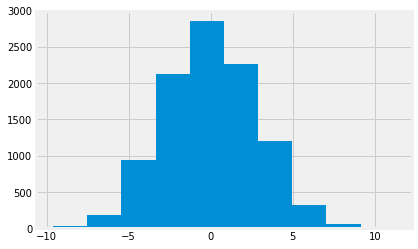

In [15]:
fake_differences = np.zeros(10000)
for i in np.arange(10000):
    np.random.shuffle(pooled)
    fake_beer = pooled[:n_beer]
    fake_water = pooled[n_beer:]
    fake_diff = np.mean(fake_beer) - np.mean(fake_water)
    fake_differences[i] = fake_diff
plt.hist(fake_differences);

In [16]:
n_ge_actual = np.count_nonzero(fake_differences >= actual_diff)
n_ge_actual

595

In [17]:
p_ge_actual = n_ge_actual / 10000
p_ge_actual

0.0595